In [2]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split


## 1. Problem biznesowy:
Celem projektu jest klasyfikacja różnych gatunków fasoli na podstawie ich cech wizualnych. 

### Dane

In [4]:
data = pd.read_csv('../Data/Dry_Bean_Dataset.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

-brak wartości NULL  
-tylko dane numeryczne (jedyna kategoryczna, to gatunek, który będziemy przewidywać)

### opisy kolumn  

Area (A): The area of a bean zone and the number of pixels within its boundaries.  
Perimeter (P): Bean circumference is defined as the length of its border.  
Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.  
Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.  
Aspect ratio (K): Defines the relationship between L and l.  
Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.  
Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.  
Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.  
Extent (Ex): The ratio of the pixels in the bounding box to the bean area.  
Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.  
Roundness (R): Calculated with the following formula: (4piA)/(P^2)  
Compactness (CO): Measures the roundness of an object: Ed/L  
ShapeFactor1 (SF1)  
ShapeFactor2 (SF2)  
ShapeFactor3 (SF3)  
ShapeFactor4 (SF4)  
Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [6]:
#PODZIAL DANYCH NA ZBIOR TRENINGOWY I WALIDACYJNY
our_data, validator_data = train_test_split(data, test_size = 0.2, random_state = 42)
our_data.to_csv('../Data/our_data.csv', index = False)
validator_data.to_csv('../Data/validator_data.csv', index = False)

X = our_data.drop('Class', axis=1)
y = our_data['Class']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
)

In [7]:
df = our_data

<AxesSubplot:xlabel='Class', ylabel='count'>

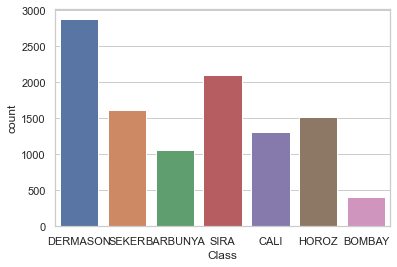

In [10]:
sns.countplot(x='Class', data = df)

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>],
       [<AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>,
        <AxesSubplot:title={'center':'ShapeFactor4'}>]], dtype=object)

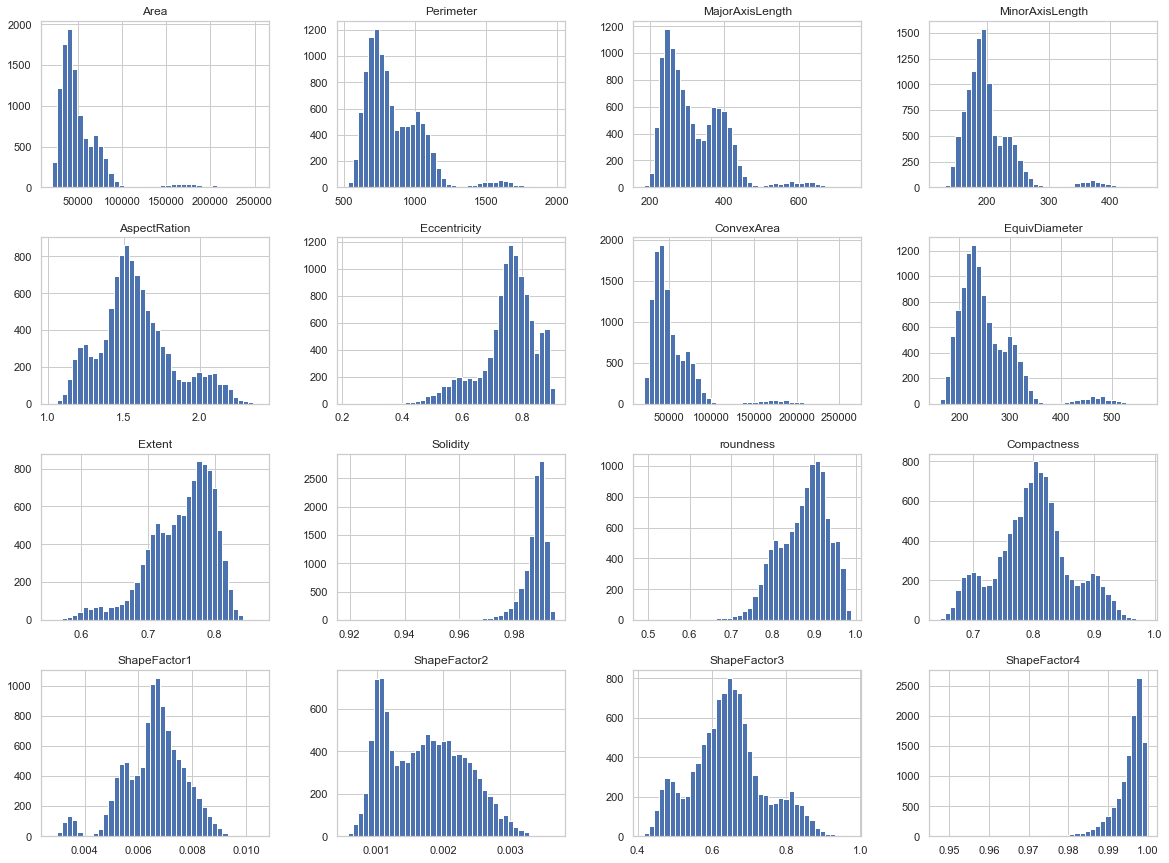

In [13]:
X.hist(bins = 40, figsize = (20,15))

-brak zmiennych o wartościach dyskretnych  
-Roundness troche jak rozjlad normalny  
-widac podział na grupy (np. w Shapefactor3)

<AxesSubplot:xlabel='Class', ylabel='ShapeFactor1'>

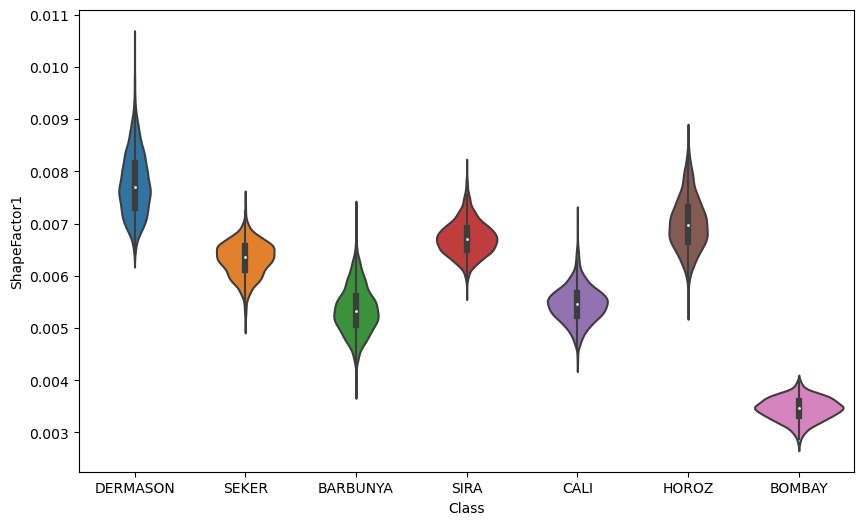

In [8]:
#rozkład shapefactor względem klasy
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='ShapeFactor1', data=df)

<AxesSubplot:xlabel='Class', ylabel='ShapeFactor2'>

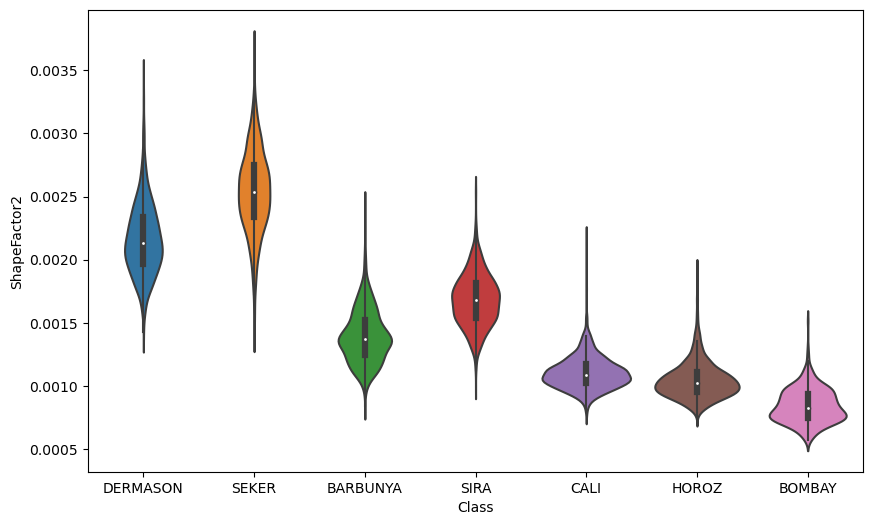

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='ShapeFactor2', data=df)

<AxesSubplot:xlabel='Class', ylabel='ShapeFactor3'>

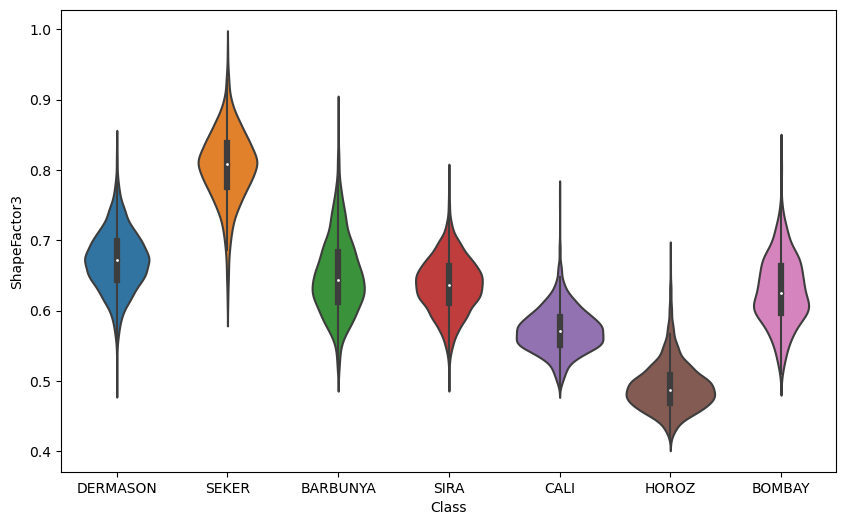

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='ShapeFactor3', data=df)

<AxesSubplot:xlabel='Class', ylabel='ShapeFactor4'>

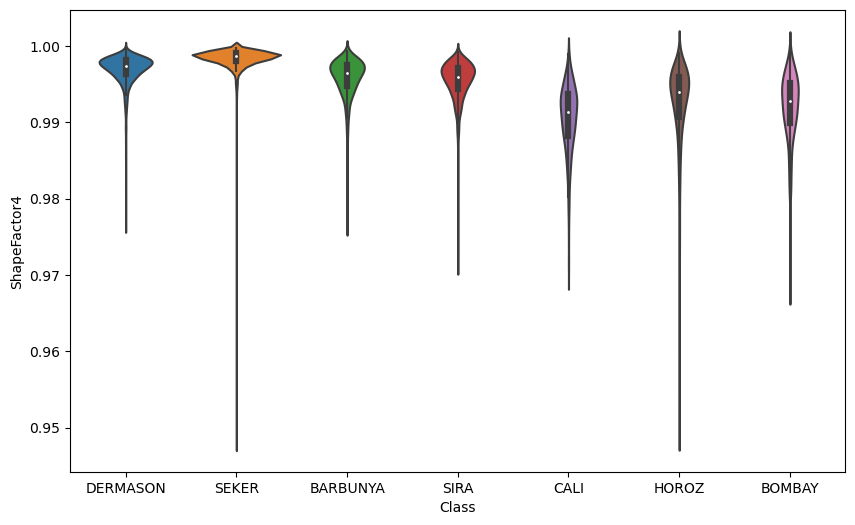

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='ShapeFactor4', data=df)

-duzo outlierow (do wyrzucenia)

<AxesSubplot:xlabel='Class', ylabel='AspectRation'>

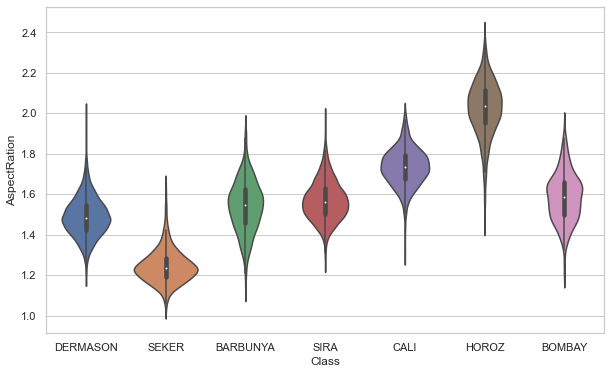

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='AspectRation', data=df)

dosc rozstrzelone - latwiej rozroznic?

<AxesSubplot:xlabel='Class', ylabel='Compactness'>

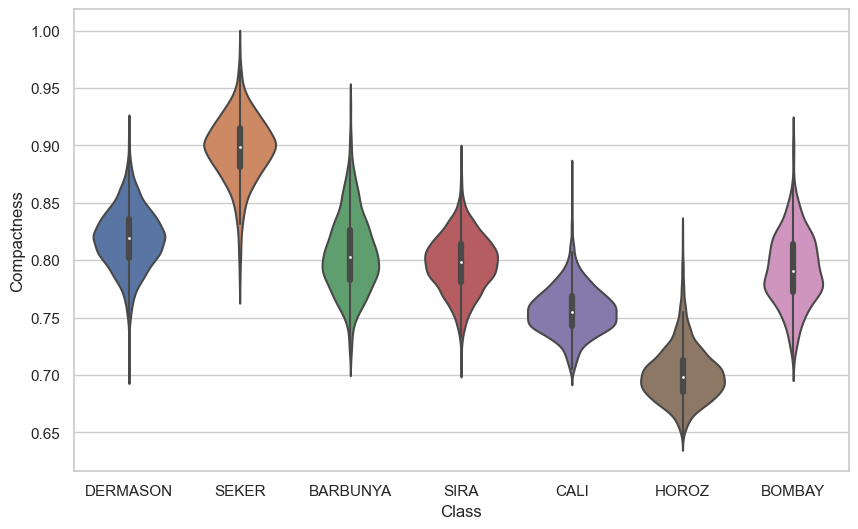

In [56]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Compactness', data=df)

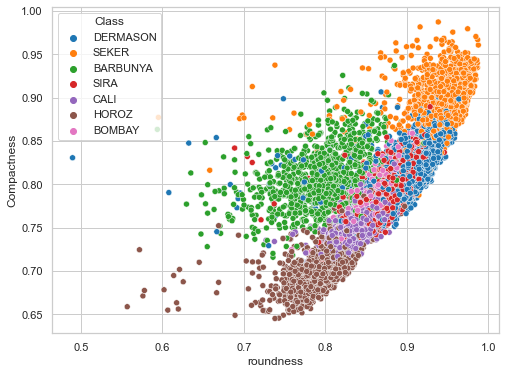

In [26]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='roundness', y='Compactness', hue='Class', data=df, palette='tab10', legend='full')

plt.show()

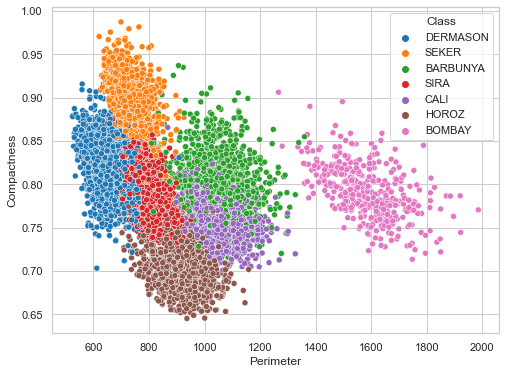

In [27]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Perimeter', y='Compactness', hue='Class', data=df, palette='tab10', legend='full')

plt.show()

-Perimeter i Compactness wydają się przydatne.

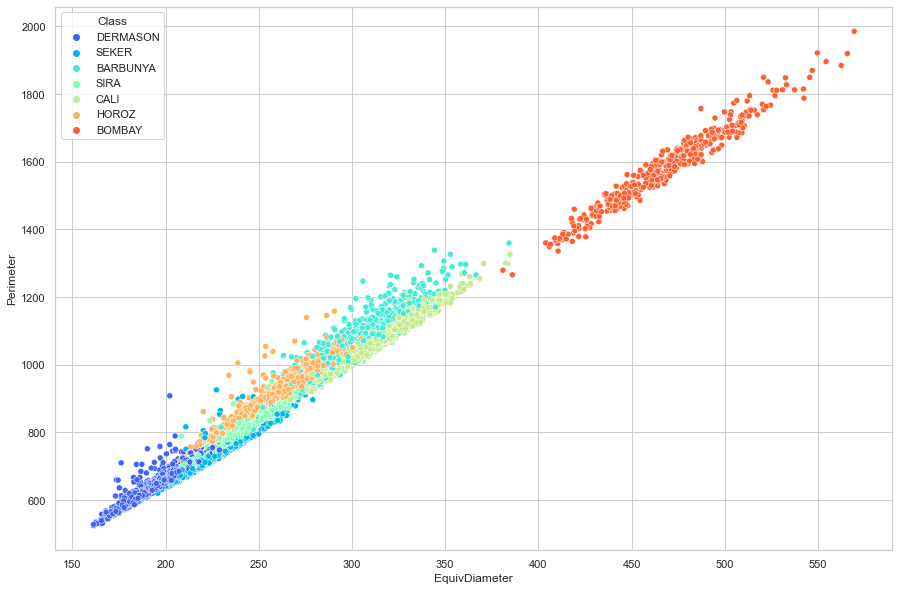

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
sns.scatterplot(x='EquivDiameter', y='Perimeter', hue='Class', data=df, palette='rainbow', legend='full')

plt.show()

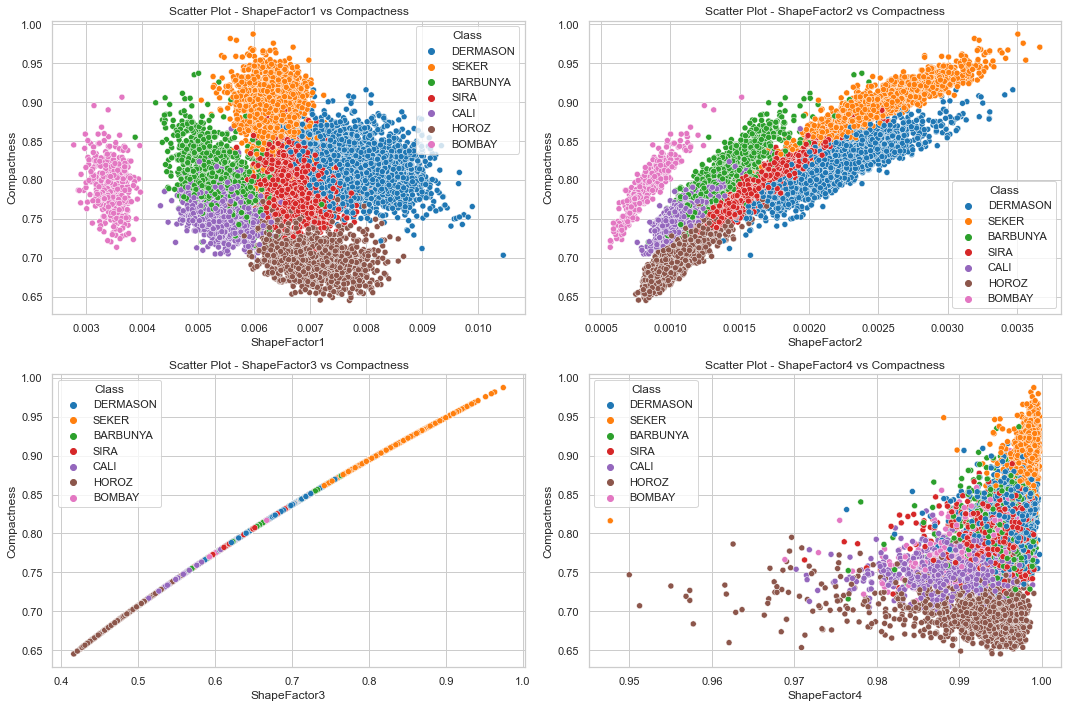

In [25]:
#SHAPE FACTORS VS. COMPACTNESS
sns.set(style="whitegrid")

shape_factors = ['ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, shape_factor in enumerate(shape_factors):
    sns.scatterplot(x=shape_factor, y='Compactness', hue='Class', data=df, ax=axes[i], palette='tab10', legend='full')
    axes[i].set_title(f"Scatter Plot - {shape_factor} vs Compactness")
    axes[i].set_xlabel(shape_factor)
    axes[i].set_ylabel('Compactness')

plt.tight_layout()
plt.show()

-Compactness i shape factor mają wysoką korelację - zapewne mona się pozbyć jednej z nich

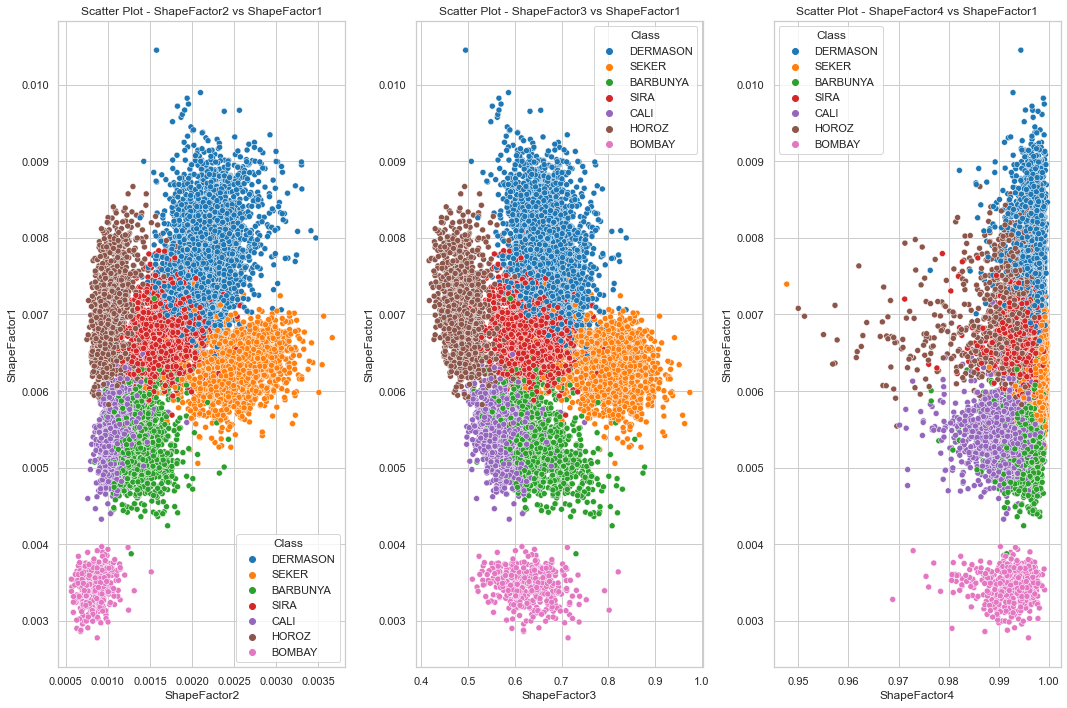

In [28]:

sns.set(style="whitegrid")
shape_factors = ['ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, shape_factor in enumerate(shape_factors):
    sns.scatterplot(x=shape_factor, y='ShapeFactor1', hue='Class', data=df, ax=axes[i], palette='tab10', legend='full')
    axes[i].set_title(f"Scatter Plot - {shape_factor} vs ShapeFactor1")
    axes[i].set_xlabel(shape_factor)
    axes[i].set_ylabel('ShapeFactor1')

plt.tight_layout()
plt.show()

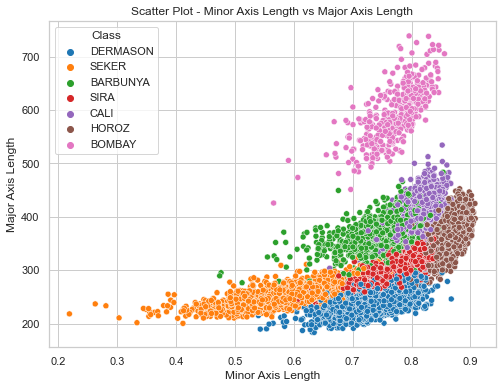

In [29]:
sns.set(style="whitegrid")

# Create scatter plot for Minor Axis Length vs Major Axis Length
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Eccentricity', y='MajorAxisLength', hue='Class', data=df, palette='tab10', legend='full')
plt.title("Scatter Plot - Minor Axis Length vs Major Axis Length")
plt.xlabel("Minor Axis Length")
plt.ylabel("Major Axis Length")

# Show the plot
plt.show()

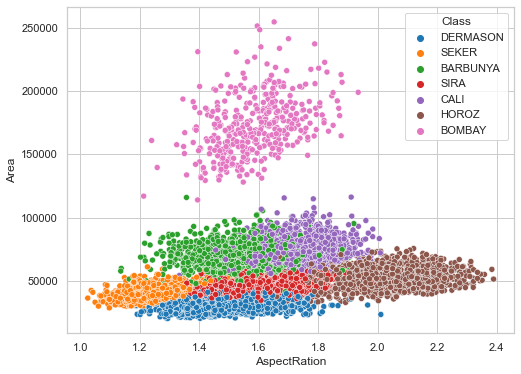

In [30]:
#ASPECT RATION VS. AREA

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='AspectRation', y='Area', hue='Class', data=df, palette='tab10', legend='full')

# Show the plot
plt.show()

-w wielu wykresach fasolka Bombay jest zdecydowanie oddzielona od innych  
 *czy warto rozdzielic model na dwa? - jeden wyłapujący sam Bombay, drugi działający na reszcie fasolek (przeskalowanych)*

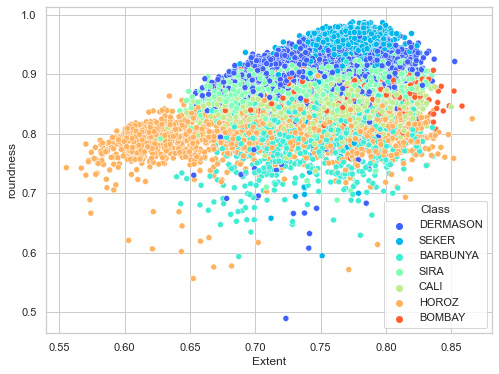

In [15]:


sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Extent', y='roundness', hue='Class', data=df, palette='rainbow', legend='full')
# Show the plot
plt.show()

Text(0.5, 1.0, 'Boxplot - Extent vs Class')

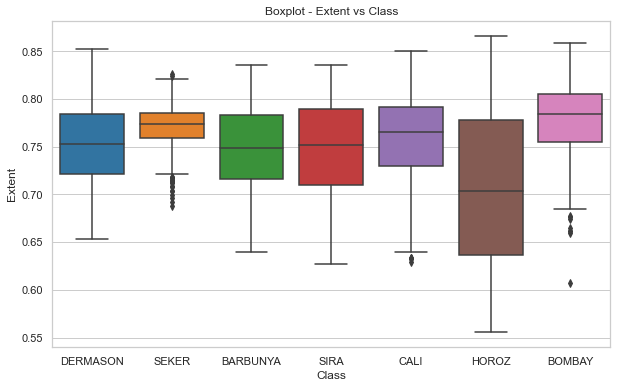

In [33]:
#extent boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Extent', data=df, palette='tab10')
plt.title("Boxplot - Extent vs Class")

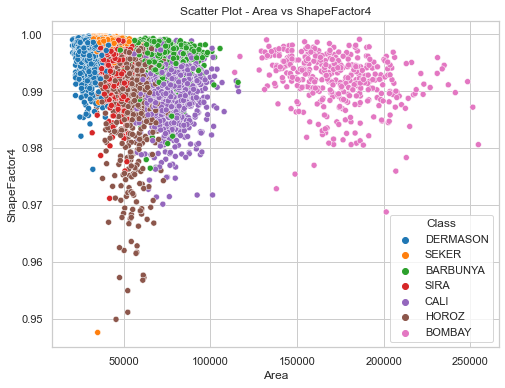

In [31]:

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area', y='ShapeFactor4', hue='Class', data=df, palette='tab10', legend='full')
plt.title("Scatter Plot - Area vs ShapeFactor4")
plt.xlabel("Area")
plt.ylabel("ShapeFactor4")

# Show the plot
plt.show()

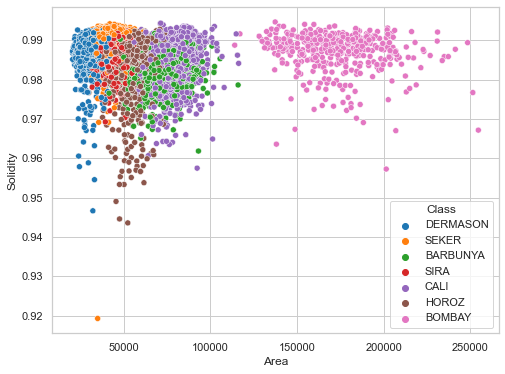

In [32]:

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area', y='Solidity', hue='Class', data=df, palette='tab10', legend='full')

# Show the plot
plt.show()

In [8]:
sns.pairplot(df, hue='Class')

In [ ]:
corr = df.drop('Class', axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

C:\Users\Zosia\AppData\Local\Temp\ipykernel_21512\1378154487.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

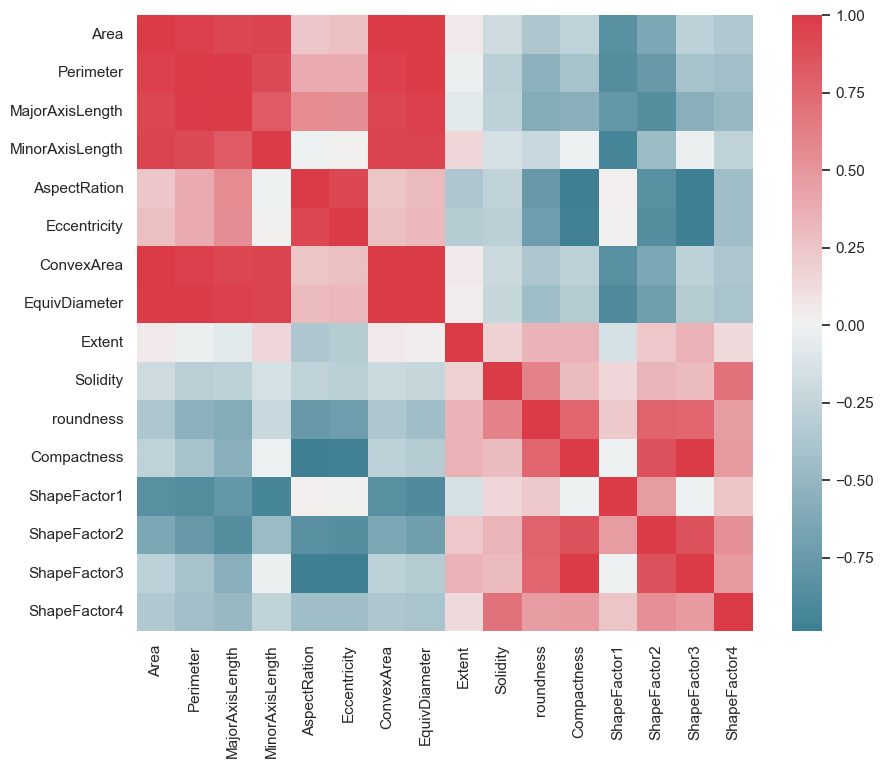

In [67]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

KOLUMNY DO WYWALENIA: 
-Compactness lub shapefactor3
-Equivalent diameter (bo mamy ju długość, szerokoś i obwód fasolki)
-ConvexArea(mamy juz normalne area)
-Eccentricity (mają bardzo podobne korelacje AspectRation)

PEWNIAKI:
-Minor, Major Axis
-Area
-AspectRation
-ShapeFactor1 + Shapefactor3


poprosimy o opinię walidatorów <3
(co do kolumn do wywalenia i pewniaków)